In [106]:
using Flux, Statistics, Printf, BSON
using Flux.Data: DataLoader
using Flux: onehotbatch, onecold, logitcrossentropy, throttle, @epochs
using Base.Iterators: repeated, partition
using Parameters: @with_kw
using MLDatasets

In [148]:
@with_kw mutable struct Args
    η::Float64 = 3e-4       # learning rate
    batchsize::Int = 1024   # batch size
    epochs::Int = 10        # number of epochs
    device::Function = gpu  # set as gpu, if gpu available
end

function getdata(args)
    # Loading Dataset
    xtrain, ytrain = MLDatasets.MNIST.traindata(Float32)
    xtest, ytest = MLDatasets.MNIST.testdata(Float32)

    # Reshape Data in order to flatten each image into a linear array
    xtrain = Flux.flatten(xtrain)
    xtest = Flux.flatten(xtest)

    # One-hot-encode the labels
    ytrain, ytest = onehotbatch(ytrain, 0:9), onehotbatch(ytest, 0:9)

    # Batching
    train_data = DataLoader(xtrain, ytrain, batchsize=args.batchsize, shuffle=true)
    test_data = DataLoader(xtest, ytest, batchsize=args.batchsize)

    return train_data, test_data
end

build_model(; imgsize=(28,28,1), nclasses=10) =  Chain(Dense(prod(imgsize), 32, relu), Dense(32, nclasses))

function loss_all(dataloader, model)
    l = 0f0
    for (x,y) in dataloader
        l += logitcrossentropy(model(x), y)
    end
    l/length(dataloader)
end

function accuracy(data_loader, model)
    acc = 0
    for (x,y) in data_loader
        acc += sum(onecold(cpu(model(x))) .== onecold(cpu(y)))*1 / size(x,2)
    end
    acc/length(data_loader)
end


accuracy (generic function with 2 methods)

In [231]:
152/8

19.0

In [232]:
27^3

19683

In [149]:
args = Args()

# Load Data
train_data,test_data = getdata(args)

# Construct model
m = build_model()
train_data = args.device.(train_data)
test_data = args.device.(test_data)
m = args.device(m)
loss(x,y) = logitcrossentropy(m(x), y)

loss (generic function with 1 method)

In [154]:
train_data[1][1][:,1]

784-element CUDA.CuArray{Float32,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [153]:
train_data[1][2]

10×1024 Flux.OneHotMatrix{CUDA.CuArray{Flux.OneHotVector,1}}:
 0  0  0  1  0  0  0  0  0  0  0  0  0  …  0  1  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  1  0  1     0  0  0  1  0  0  1  0  0  0  0  1
 0  0  1  0  0  0  0  1  0  0  0  0  0     0  0  1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  1  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  1  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  1  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  1  0  0  1  0  0  0  0     0  0  0  0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0  0  1  0  1  0     1  0  0  0  1  0  0  1  0  0  0  0

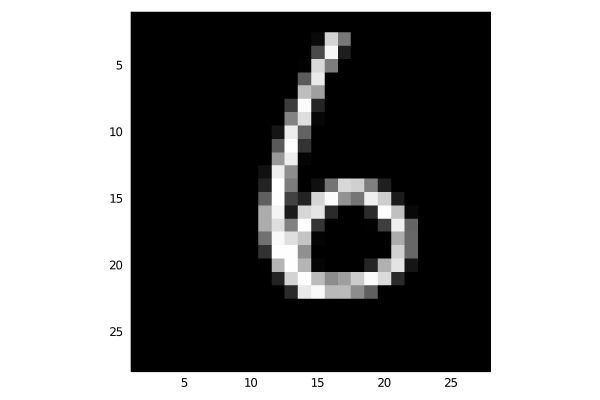

In [155]:
plot(Gray.(reshape(train_data[1][1][:,1], (28, 28))'))

In [163]:
argmax(softmax(m(train_data[1][1][:,1])))

7

In [161]:
## Training
evalcb = () -> @show(loss_all(train_data, m))
opt = ADAM(args.η)

ADAM(0.0003, (0.9, 0.999), IdDict{Any,Any}())

In [162]:
@epochs args.epochs Flux.train!(loss, params(m), train_data, opt, cb = evalcb)

loss_all(train_data, m) = 2.3534393f0
loss_all(train_data, m) = 2.33233f0
loss_all(train_data, m) = 2.311852f0


┌ Info: Epoch 1
└ @ Main C:\Users\racinsky\.julia\packages\Flux\05b38\src\optimise\train.jl:114


loss_all(train_data, m) = 2.2918763f0
loss_all(train_data, m) = 2.2723298f0
loss_all(train_data, m) = 2.253152f0
loss_all(train_data, m) = 2.2343214f0
loss_all(train_data, m) = 2.2158368f0
loss_all(train_data, m) = 2.197687f0
loss_all(train_data, m) = 2.1797366f0
loss_all(train_data, m) = 2.1619365f0
loss_all(train_data, m) = 2.1443284f0
loss_all(train_data, m) = 2.126797f0
loss_all(train_data, m) = 2.1093059f0
loss_all(train_data, m) = 2.0918574f0
loss_all(train_data, m) = 2.0744774f0
loss_all(train_data, m) = 2.0571132f0
loss_all(train_data, m) = 2.0397215f0
loss_all(train_data, m) = 2.0223613f0
loss_all(train_data, m) = 2.0049448f0
loss_all(train_data, m) = 1.98755f0
loss_all(train_data, m) = 1.9701319f0
loss_all(train_data, m) = 1.9527042f0
loss_all(train_data, m) = 1.935273f0
loss_all(train_data, m) = 1.9178132f0
loss_all(train_data, m) = 1.9003494f0
loss_all(train_data, m) = 1.8828906f0
loss_all(train_data, m) = 1.8654956f0
loss_all(train_data, m) = 1.8481374f0
loss_all(train_dat

┌ Info: Epoch 2
└ @ Main C:\Users\racinsky\.julia\packages\Flux\05b38\src\optimise\train.jl:114



loss_all(train_data, m) = 1.3132577f0
loss_all(train_data, m) = 1.2995521f0
loss_all(train_data, m) = 1.2860391f0
loss_all(train_data, m) = 1.2727554f0
loss_all(train_data, m) = 1.2596326f0
loss_all(train_data, m) = 1.2467123f0
loss_all(train_data, m) = 1.2340101f0
loss_all(train_data, m) = 1.2214692f0
loss_all(train_data, m) = 1.2091569f0
loss_all(train_data, m) = 1.1970707f0
loss_all(train_data, m) = 1.1851658f0
loss_all(train_data, m) = 1.1734552f0
loss_all(train_data, m) = 1.1619617f0
loss_all(train_data, m) = 1.1506397f0
loss_all(train_data, m) = 1.1395242f0
loss_all(train_data, m) = 1.1286485f0
loss_all(train_data, m) = 1.1179984f0
loss_all(train_data, m) = 1.1075038f0
loss_all(train_data, m) = 1.0971745f0
loss_all(train_data, m) = 1.086995f0
loss_all(train_data, m) = 1.076983f0
loss_all(train_data, m) = 1.0671269f0
loss_all(train_data, m) = 1.0573685f0
loss_all(train_data, m) = 1.047771f0
loss_all(train_data, m) = 1.0383588f0
loss_all(train_data, m) = 1.0291572f0
loss_all(train

┌ Info: Epoch 3
└ @ Main C:\Users\racinsky\.julia\packages\Flux\05b38\src\optimise\train.jl:114


0.8009356f0
loss_all(train_data, m) = 0.7958158f0
loss_all(train_data, m) = 0.7907799f0
loss_all(train_data, m) = 0.78582895f0
loss_all(train_data, m) = 0.78098035f0
loss_all(train_data, m) = 0.7761857f0
loss_all(train_data, m) = 0.77146155f0
loss_all(train_data, m) = 0.7668231f0
loss_all(train_data, m) = 0.7622621f0
loss_all(train_data, m) = 0.75779235f0
loss_all(train_data, m) = 0.75339454f0
loss_all(train_data, m) = 0.7490568f0
loss_all(train_data, m) = 0.7447935f0
loss_all(train_data, m) = 0.74059796f0
loss_all(train_data, m) = 0.7364681f0
loss_all(train_data, m) = 0.73239285f0
loss_all(train_data, m) = 0.72838014f0
loss_all(train_data, m) = 0.7244573f0
loss_all(train_data, m) = 0.72060186f0
loss_all(train_data, m) = 0.71680087f0
loss_all(train_data, m) = 0.71304184f0
loss_all(train_data, m) = 0.7093369f0
loss_all(train_data, m) = 0.705679f0
loss_all(train_data, m) = 0.7020449f0
loss_all(train_data, m) = 0.6984578f0
loss_all(train_data, m) = 0.69493455f0
loss_all(train_data, m) = 0

┌ Info: Epoch 4
└ @ Main C:\Users\racinsky\.julia\packages\Flux\05b38\src\optimise\train.jl:114



loss_all(train_data, m) = 0.5931529f0
loss_all(train_data, m) = 0.59085864f0
loss_all(train_data, m) = 0.58860177f0
loss_all(train_data, m) = 0.5863525f0
loss_all(train_data, m) = 0.5841315f0
loss_all(train_data, m) = 0.58195174f0
loss_all(train_data, m) = 0.5798066f0
loss_all(train_data, m) = 0.5777191f0
loss_all(train_data, m) = 0.57565427f0
loss_all(train_data, m) = 0.5736128f0
loss_all(train_data, m) = 0.57159305f0
loss_all(train_data, m) = 0.5696021f0
loss_all(train_data, m) = 0.56763947f0
loss_all(train_data, m) = 0.56568027f0
loss_all(train_data, m) = 0.5637178f0
loss_all(train_data, m) = 0.56180084f0
loss_all(train_data, m) = 0.55991507f0
loss_all(train_data, m) = 0.5580545f0
loss_all(train_data, m) = 0.5562108f0
loss_all(train_data, m) = 0.55438757f0
loss_all(train_data, m) = 0.5525823f0
loss_all(train_data, m) = 0.5508011f0
loss_all(train_data, m) = 0.5490407f0
loss_all(train_data, m) = 0.5473154f0
loss_all(train_data, m) = 0.54561543f0
loss_all(train_data, m) = 0.5439147f0


┌ Info: Epoch 5
└ @ Main C:\Users\racinsky\.julia\packages\Flux\05b38\src\optimise\train.jl:114


loss_all(train_data, m) = 0.49853855f0
loss_all(train_data, m) = 0.49731052f0
loss_all(train_data, m) = 0.49604863f0
loss_all(train_data, m) = 0.49476096f0
loss_all(train_data, m) = 0.49345604f0
loss_all(train_data, m) = 0.49216035f0
loss_all(train_data, m) = 0.4908761f0
loss_all(train_data, m) = 0.48959175f0
loss_all(train_data, m) = 0.48833087f0
loss_all(train_data, m) = 0.48709065f0
loss_all(train_data, m) = 0.4858665f0
loss_all(train_data, m) = 0.4846903f0
loss_all(train_data, m) = 0.4835205f0
loss_all(train_data, m) = 0.48236543f0
loss_all(train_data, m) = 0.48121592f0
loss_all(train_data, m) = 0.4800877f0
loss_all(train_data, m) = 0.47898334f0
loss_all(train_data, m) = 0.47786835f0
loss_all(train_data, m) = 0.47672296f0
loss_all(train_data, m) = 0.47560152f0
loss_all(train_data, m) = 0.4745037f0
loss_all(train_data, m) = 0.47342408f0
loss_all(train_data, m) = 0.4723551f0
loss_all(train_data, m) = 0.47129583f0
loss_all(train_data, m) = 0.47024992f0
loss_all(train_data, m) = 0.4692

┌ Info: Epoch 6
└ @ Main C:\Users\racinsky\.julia\packages\Flux\05b38\src\optimise\train.jl:114



loss_all(train_data, m) = 0.43511206f0
loss_all(train_data, m) = 0.43427226f0
loss_all(train_data, m) = 0.4334367f0
loss_all(train_data, m) = 0.43260458f0
loss_all(train_data, m) = 0.4317697f0
loss_all(train_data, m) = 0.43095407f0
loss_all(train_data, m) = 0.43015197f0
loss_all(train_data, m) = 0.42935452f0
loss_all(train_data, m) = 0.42860496f0
loss_all(train_data, m) = 0.42785507f0
loss_all(train_data, m) = 0.42711678f0
loss_all(train_data, m) = 0.42637646f0
loss_all(train_data, m) = 0.42565337f0
loss_all(train_data, m) = 0.424952f0
loss_all(train_data, m) = 0.42423072f0
loss_all(train_data, m) = 0.42346492f0
loss_all(train_data, m) = 0.42271355f0
loss_all(train_data, m) = 0.42198285f0
loss_all(train_data, m) = 0.42126763f0
loss_all(train_data, m) = 0.4205607f0
loss_all(train_data, m) = 0.41986144f0
loss_all(train_data, m) = 0.41917372f0
loss_all(train_data, m) = 0.4185153f0
loss_all(train_data, m) = 0.41786897f0
loss_all(train_data, m) = 0.4172403f0
loss_all(train_data, m) = 0.416

┌ Info: Epoch 7
└ @ Main C:\Users\racinsky\.julia\packages\Flux\05b38\src\optimise\train.jl:114


loss_all(train_data, m) = 0.3954254f0
loss_all(train_data, m) = 0.3948295f0
loss_all(train_data, m) = 0.39423594f0
loss_all(train_data, m) = 0.39364436f0
loss_all(train_data, m) = 0.39305085f0
loss_all(train_data, m) = 0.39247462f0
loss_all(train_data, m) = 0.39190868f0
loss_all(train_data, m) = 0.39134127f0
loss_all(train_data, m) = 0.39082307f0
loss_all(train_data, m) = 0.39030117f0
loss_all(train_data, m) = 0.38978887f0
loss_all(train_data, m) = 0.389271f0
loss_all(train_data, m) = 0.38876796f0
loss_all(train_data, m) = 0.38828722f0
loss_all(train_data, m) = 0.38778093f0
loss_all(train_data, m) = 0.3872213f0
loss_all(train_data, m) = 0.38667133f0
loss_all(train_data, m) = 0.38614073f0
loss_all(train_data, m) = 0.3856246f0
loss_all(train_data, m) = 0.38511482f0
loss_all(train_data, m) = 0.3846124f0
loss_all(train_data, m) = 0.38411984f0
loss_all(train_data, m) = 0.38366044f0
loss_all(train_data, m) = 0.38321164f0
loss_all(train_data, m) = 0.38277817f0
loss_all(train_data, m) = 0.3823

┌ Info: Epoch 8
└ @ Main C:\Users\racinsky\.julia\packages\Flux\05b38\src\optimise\train.jl:114


loss_all(train_data, m) = 0.3664349f0
loss_all(train_data, m) = 0.36598304f0
loss_all(train_data, m) = 0.3655332f0
loss_all(train_data, m) = 0.3650815f0
loss_all(train_data, m) = 0.364645f0
loss_all(train_data, m) = 0.36421937f0
loss_all(train_data, m) = 0.36378822f0
loss_all(train_data, m) = 0.36340868f0
loss_all(train_data, m) = 0.3630237f0
loss_all(train_data, m) = 0.36264846f0
loss_all(train_data, m) = 0.36226544f0
loss_all(train_data, m) = 0.36189532f0
loss_all(train_data, m) = 0.3615465f0
loss_all(train_data, m) = 0.36117125f0
loss_all(train_data, m) = 0.3607373f0
loss_all(train_data, m) = 0.3603083f0
loss_all(train_data, m) = 0.35989836f0
loss_all(train_data, m) = 0.35950246f0
loss_all(train_data, m) = 0.35911036f0
loss_all(train_data, m) = 0.35872418f0
loss_all(train_data, m) = 0.35834667f0
loss_all(train_data, m) = 0.35800594f0
loss_all(train_data, m) = 0.35767546f0
loss_all(train_data, m) = 0.3573604f0
loss_all(train_data, m) = 0.35703632f0
loss_all(train_data, m) = 0.3566972

┌ Info: Epoch 9
└ @ Main C:\Users\racinsky\.julia\packages\Flux\05b38\src\optimise\train.jl:114



loss_all(train_data, m) = 0.34577948f0
loss_all(train_data, m) = 0.34548798f0
loss_all(train_data, m) = 0.34517133f0
loss_all(train_data, m) = 0.34481224f0
loss_all(train_data, m) = 0.3444497f0
loss_all(train_data, m) = 0.34408844f0
loss_all(train_data, m) = 0.34372553f0
loss_all(train_data, m) = 0.34337807f0
loss_all(train_data, m) = 0.34304422f0
loss_all(train_data, m) = 0.342702f0
loss_all(train_data, m) = 0.34241492f0
loss_all(train_data, m) = 0.34212098f0
loss_all(train_data, m) = 0.3418367f0
loss_all(train_data, m) = 0.34154445f0
loss_all(train_data, m) = 0.34126258f0
loss_all(train_data, m) = 0.34100166f0
loss_all(train_data, m) = 0.34071174f0
loss_all(train_data, m) = 0.3403573f0
loss_all(train_data, m) = 0.34000376f0
loss_all(train_data, m) = 0.339669f0
loss_all(train_data, m) = 0.33934915f0
loss_all(train_data, m) = 0.3390324f0
loss_all(train_data, m) = 0.33872104f0
loss_all(train_data, m) = 0.33841816f0
loss_all(train_data, m) = 0.3381539f0
loss_all(train_data, m) = 0.33790

┌ Info: Epoch 10
└ @ Main C:\Users\racinsky\.julia\packages\Flux\05b38\src\optimise\train.jl:114


loss_all(train_data, m) = 0.32795027f0
loss_all(train_data, m) = 0.327653f0
loss_all(train_data, m) = 0.32735053f0
loss_all(train_data, m) = 0.32705027f0
loss_all(train_data, m) = 0.32674813f0
loss_all(train_data, m) = 0.32646185f0
loss_all(train_data, m) = 0.32618856f0
loss_all(train_data, m) = 0.32590485f0
loss_all(train_data, m) = 0.32567945f0
loss_all(train_data, m) = 0.32544687f0
loss_all(train_data, m) = 0.32522225f0
loss_all(train_data, m) = 0.32499117f0
loss_all(train_data, m) = 0.3247693f0
loss_all(train_data, m) = 0.32456863f0
loss_all(train_data, m) = 0.3243359f0
loss_all(train_data, m) = 0.3240318f0
loss_all(train_data, m) = 0.32372582f0
loss_all(train_data, m) = 0.32343975f0
loss_all(train_data, m) = 0.32317f0
loss_all(train_data, m) = 0.3229035f0
loss_all(train_data, m) = 0.32264292f0
loss_all(train_data, m) = 0.32239106f0
loss_all(train_data, m) = 0.32217875f0
loss_all(train_data, m) = 0.32197762f0
loss_all(train_data, m) = 0.32179475f0
loss_all(train_data, m) = 0.321599

In [164]:
@show accuracy(train_data, m)

accuracy(train_data, m) = 0.9157934809879572


0.9157934809879572

In [165]:
@show accuracy(test_data, m)

accuracy(test_data, m) = 0.9196687659438776


0.9196687659438776

In [166]:
x_mb, y_mb = test_data[1]

(Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0])

In [168]:
x = x_mb[:, 4]

784-element CUDA.CuArray{Float32,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [169]:
y = y_mb[:, 4]

10-element Flux.OneHotVector:
 1
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [185]:
size.(params(m))

4-element Array{Tuple{Int64,Vararg{Int64,N} where N},1}:
 (32, 784)
 (32,)
 (10, 32)
 (10,)

In [186]:
 (32* 784) + 32 + (10* 32) +(10)

25450

In [187]:
784

784

In [188]:
25450/784

32.46173469387755

In [198]:
(32* 784) + 32

25120

In [197]:
params(Chain(Dense(784, 32))) .|> size

2-element Array{Tuple{Int64,Vararg{Int64,N} where N},1}:
 (32, 784)
 (32,)

In [194]:
 (32* 784) + 32

25120

In [202]:
params(Chain(Conv((3, 3), 1=>16, pad=(1,1), relu))) .|> size

2-element Array{Tuple{Int64,Vararg{Int64,N} where N},1}:
 (3, 3, 1, 16)
 (16,)

In [203]:
3*3*1*16+16

160

In [170]:
reshape(x, (28, 28))

28×28 CUDA.CuArray{Float32,2}:
 0.0  0.0  0.0  0.0  0.0        0.0       …  0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0        0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0        0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0        0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0        0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0        0.0       …  0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0        0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0        0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0        0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0        0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0        0.0       …  0.282353  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0        0.0          0.682353  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0431373  0.145098     0.984314  0.0  0.0  0.0  0.0
 ⋮     

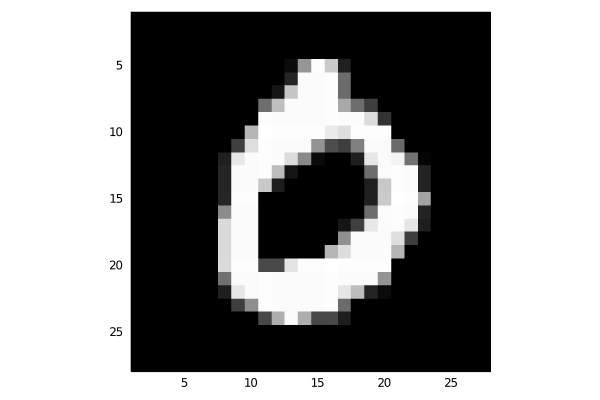

In [171]:
using Colors, Plots
plot(Gray.(reshape(x, (28, 28))'))

In [172]:
m(x)

10-element CUDA.CuArray{Float32,1}:
  9.100636
 -7.244237
  1.0222098
  0.3414997
 -3.270363
  2.0761306
  2.4745414
  2.2513554
  0.15240425
  0.11222842

In [173]:
softmax(m(x))

10-element CUDA.CuArray{Float32,1}:
 0.99601436
 7.9392244f-8
 0.00030892284
 0.00015639434
 4.222885f-6
 0.0008862617
 0.0013200475
 0.0010559928
 0.00012944879
 0.0001243512

In [80]:
ilabels = Dict(k=>v for (k,v) in enumerate(0:9))

Dict{Int64,Int64} with 10 entries:
  7  => 6
  4  => 3
  9  => 8
  10 => 9
  2  => 1
  3  => 2
  5  => 4
  8  => 7
  6  => 5
  1  => 0

In [81]:
ilabels[argmax(softmax(m(x)))]

0

In [82]:
ilabels[argmax(y)]

0

### and now, convnet

In [204]:
# Bundle images together with labels and group into minibatchess
function make_minibatch(X, Y, idxs)
    X_batch = Array{Float32}(undef, size(X[1])..., 1, length(idxs))
    for i in 1:length(idxs)
        X_batch[:, :, :, i] = Float32.(X[idxs[i]])
    end
    Y_batch = onehotbatch(Y[idxs], 0:9)
    return (X_batch, Y_batch)
end

function get_processed_data(args)
    # Load labels and images from Flux.Data.MNIST
    train_labels = Flux.Data.MNIST.labels()
    train_imgs = Flux.Data.MNIST.images()
    mb_idxs = partition(1:length(train_imgs), args.batchsize)
    train_set = [make_minibatch(train_imgs, train_labels, i) for i in mb_idxs] 
    
    # Prepare test set as one giant minibatch:
    test_imgs = Flux.Data.MNIST.images(:test)
    test_labels = Flux.Data.MNIST.labels(:test)
    test_set = make_minibatch(test_imgs, test_labels, 1:length(test_imgs))

    return train_set, test_set

end

# Build model
function build_model(args; imgsize = (28,28,1), nclasses = 10)
    cnn_output_size = Int.(floor.([imgsize[1]/8,imgsize[2]/8,32]))	

    return Chain(
    # First convolution, operating upon a 28x28 image
    Conv((3, 3), imgsize[3]=>16, pad=(1,1), relu),
    MaxPool((2,2)),

    # Second convolution, operating upon a 14x14 image
    Conv((3, 3), 16=>32, pad=(1,1), relu),
    MaxPool((2,2)),

    # Third convolution, operating upon a 7x7 image
    Conv((3, 3), 32=>32, pad=(1,1), relu),
    MaxPool((2,2)),

    # Reshape 3d tensor into a 2d one using `Flux.flatten`, at this point it should be (3, 3, 32, N)
    flatten,
    Dense(prod(cnn_output_size), 10))
end

# We augment `x` a little bit here, adding in random noise. 
augment(x) = x .+ gpu(0.1f0*randn(eltype(x), size(x)))

# Returns a vector of all parameters used in model
paramvec(m) = vcat(map(p->reshape(p, :), params(m))...)

# Function to check if any element is NaN or not
anynan(x) = any(isnan.(x))

accuracy(x, y, model) = mean(onecold(cpu(model(x))) .== onecold(cpu(y)))

accuracy (generic function with 2 methods)

In [205]:
@info("Loading data set")
train_set, test_set = get_processed_data(args)

# Define our model.  We will use a simple convolutional architecture with
# three iterations of Conv -> ReLU -> MaxPool, followed by a final Dense layer.
@info("Building model...")
model = build_model(args) 

# Load model and datasets onto GPU, if enabled
train_set = gpu.(train_set)
test_set = gpu.(test_set)
model = gpu(model)
    
# Make sure our model is nicely precompiled before starting our training loop
model(train_set[1][1])

┌ Info: Loading data set
└ @ Main In[205]:1
┌ Info: Building model...
└ @ Main In[205]:6


10×1024 CUDA.CuArray{Float32,2}:
 -0.152844   -0.0567296   -0.133809   …  -0.0971932   -0.156798   -0.16988
  0.49274     0.48366      0.306898       0.386404     0.354929    0.28528
 -0.362488   -0.394094    -0.321329      -0.309374    -0.156161   -0.222034
 -0.553467   -0.478159    -0.328884      -0.459818    -0.338256   -0.324816
 -0.150685   -0.150046    -0.124735      -0.162954    -0.183706   -0.0779078
  0.112264    0.215925     0.0372589  …   0.200659     0.0973102   0.1025
  0.159455    0.175958     0.241634       0.109035     0.0602391   0.172034
  0.115193    0.00751759   0.143929       0.0534566    0.0544095   0.131226
 -0.172827   -0.291618    -0.250652      -0.305815    -0.152088   -0.333183
 -0.0136642  -0.0106917    0.0938564      0.00201493  -0.0539994   0.0996487

In [208]:
reduce.(*, size.(params(model))) |> sum

16938

In [209]:
16938/25000

0.67752

In [210]:
# `loss()` calculates the crossentropy loss between our prediction `y_hat`
# (calculated from `model(x)`) and the ground truth `y`.  We augment the data
# a bit, adding gaussian random noise to our image to make it more robust.
function loss(x, y)    
    x̂ = augment(x)
    ŷ = model(x̂)
    return logitcrossentropy(ŷ, y)
end

loss (generic function with 1 method)

In [211]:
model

Chain(Conv((3, 3), 1=>16, relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), Conv((3, 3), 16=>32, relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), Conv((3, 3), 32=>32, relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), flatten, Dense(288, 10))

In [213]:

# Train our model with the given training set using the ADAM optimizer and
# printing out performance against the test set as we go.
opt = ADAM(args.η)
best_model = nothing
@info("Beginning training loop...")
best_acc = 0.0
last_improvement = 0
for epoch_idx in 1:args.epochs
    # Train for a single epoch
    Flux.train!(loss, params(model), train_set, opt)
    
    # Terminate on NaN
    if anynan(paramvec(model))
        @error "NaN params"
            break
        end

    # Calculate accuracy:
    acc = accuracy(test_set..., model)

    @info(@sprintf("[%d]: Test accuracy: %.4f", epoch_idx, acc))
    # If our accuracy is good enough, quit out.
    if acc >= 0.999
        @info(" -> Early-exiting: We reached our target accuracy of 99.9%")
        break
    end

    # If this is the best accuracy we've seen so far, save the model out
    if acc >= best_acc
        @info(" -> New best accuracy! Saving model out to mnist_conv.bson")
        ispath("cnn_saved") || mkpath("cnn_saved")
        BSON.@save joinpath("cnn_saved", "mnist_conv.bson") params=cpu.(params(model)) epoch_idx acc
        best_acc = acc
        last_improvement = epoch_idx
        best_model = model
    end

    # If we haven't seen improvement in 5 epochs, drop our learning rate:
    if epoch_idx - last_improvement >= 5 && opt.eta > 1e-6
        opt.eta /= 10.0
        @warn(" -> Haven't improved in a while, dropping learning rate to $(opt.eta)!")
   
        # After dropping learning rate, give it a few epochs to improve
        last_improvement = epoch_idx
    end

    if epoch_idx - last_improvement >= 10
        @warn(" -> We're calling this converged.")
        break
    end
end

┌ Info: Beginning training loop...
└ @ Main In[213]:6
┌ Info: [1]: Test accuracy: 0.9376
└ @ Main In[213]:22
┌ Info:  -> New best accuracy! Saving model out to mnist_conv.bson
└ @ Main In[213]:31
┌ Info: [2]: Test accuracy: 0.9454
└ @ Main In[213]:22
┌ Info:  -> New best accuracy! Saving model out to mnist_conv.bson
└ @ Main In[213]:31
┌ Info: [3]: Test accuracy: 0.9510
└ @ Main In[213]:22
┌ Info:  -> New best accuracy! Saving model out to mnist_conv.bson
└ @ Main In[213]:31
┌ Info: [4]: Test accuracy: 0.9563
└ @ Main In[213]:22
┌ Info:  -> New best accuracy! Saving model out to mnist_conv.bson
└ @ Main In[213]:31
┌ Info: [5]: Test accuracy: 0.9605
└ @ Main In[213]:22
┌ Info:  -> New best accuracy! Saving model out to mnist_conv.bson
└ @ Main In[213]:31
┌ Info: [6]: Test accuracy: 0.9630
└ @ Main In[213]:22
┌ Info:  -> New best accuracy! Saving model out to mnist_conv.bson
└ @ Main In[213]:31
┌ Info: [7]: Test accuracy: 0.9659
└ @ Main In[213]:22
┌ Info:  -> New best accuracy! Saving m

#### testing

In [214]:
@show accuracy(test_set...,best_model)

accuracy(test_set..., best_model) = 0.9712


0.9712

In [218]:
x = test_set[1][:, :, :, 50:50]

28×28×1×1 CUDA.CuArray{Float32,4}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0       0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0       0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0       0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0       0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0       0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0       0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0       0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0       0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0       0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0       0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0       0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.513726  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.592157  0.0  0.0  0.0  0.0  0.0
 

In [227]:
minimum(x)

0.0f0

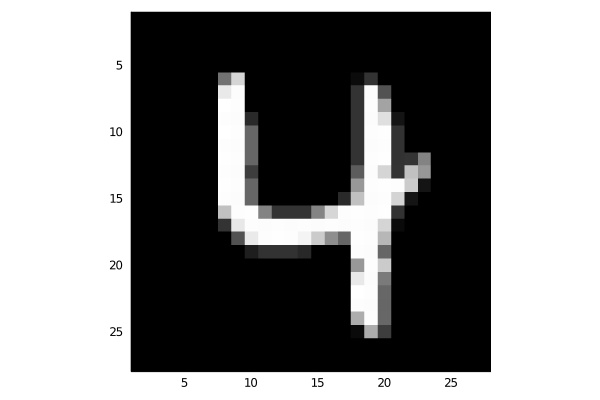

In [219]:
plot(Gray.(reshape(x, (28, 28))))

In [220]:
y = test_set[2][:, 50]

10-element Flux.OneHotVector:
 0
 0
 0
 0
 1
 0
 0
 0
 0
 0

In [133]:
model(x)

10×1 CUDA.CuArray{Float32,2}:
  -5.6191826
  -5.4696956
  -0.2712011
  -0.6270556
 -13.297237
  -7.0104823
 -14.633313
  10.112224
  -2.7695477
  -1.6269535

In [221]:
softmax(model(x))

10×1 CUDA.CuArray{Float32,2}:
 1.1420706f-8
 1.4447801f-6
 3.2483037f-8
 1.1095613f-10
 0.9999125
 8.6779195f-8
 3.5969442f-6
 7.271503f-8
 1.2942992f-7
 8.217325f-5

In [222]:
softmax(best_model(x))

10×1 CUDA.CuArray{Float32,2}:
 1.1420706f-8
 1.4447801f-6
 3.2483037f-8
 1.1095613f-10
 0.9999125
 8.6779195f-8
 3.5969442f-6
 7.271503f-8
 1.2942992f-7
 8.217325f-5

In [223]:
ilabels[argmax(model(x)[:,1])]

4

In [224]:
ilabels[argmax(y)]

4

1.25